In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona.crs
import numpy as np
import pandas as pd
import math
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from folium.plugins import HeatMap
import folium
import branca.colormap as cm
import warnings
warnings.filterwarnings('ignore')

# https://wiki.openstreetmap.org/wiki/Map_features
# graph = ox.graph_from_place(place_name)
# fig, ax = ox.plot_graph(graph)
# plt.tight_layout()

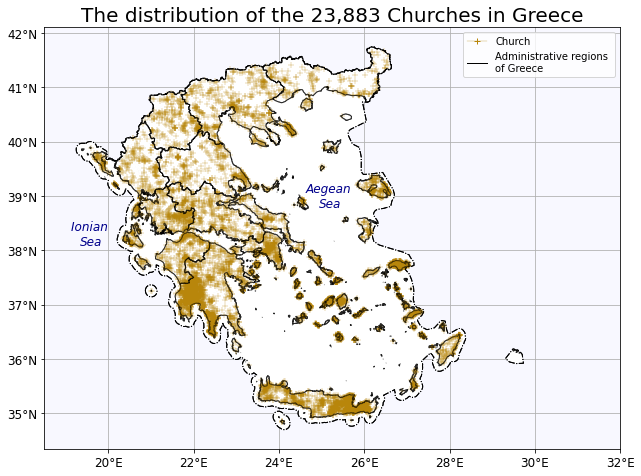

In [13]:
warnings.filterwarnings('ignore')

place_name = "Greece" #"Περιφέρεια Κεντρικής Μακεδονίας"

# church_gr = ox.geometries.geometries_from_place(place_name,  tags = {"amenity":'place_of_worship'})
crs = fiona.crs.from_epsg(2100)
gr = gpd.read_file('greece.json')
gr = gpd.GeoDataFrame(gr, geometry = 'geometry', crs=crs)
greece = gpd.read_file("periphereies.shp")
greece = greece.to_crs(epsg=4326)
greece = greece.geometry

geo_church_gr = gpd.GeoDataFrame(church_gr, geometry = 'geometry', crs=crs)

formatterY = FuncFormatter(lambda y, pos: u'{0:2g}\N{DEGREE SIGN}N'.format(y))
formatterX = FuncFormatter(lambda x, pos: u'{0:2g}\N{DEGREE SIGN}E'.format(x))

fig=plt.figure(figsize = (10, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# axes2 = fig.add_axes([0.72, 0.43, 0.16, 0.16]) # inset axes

ax.plot([22.9,22.91], [40.65, 40.66], color = 'darkgoldenrod', marker = '+', linewidth=0.3, label = 'Church')
ax.plot([22.9,22.91], [40.65, 40.66], color = 'black', linewidth=1, label = 'Administrative regions \nof Greece')
ax.legend()

gr.plot(ax=ax, color = "white", edgecolor = 'black', ls = '-.', zorder = 8)
gr.plot(ax=ax, color = "none", edgecolor = 'black', ls = '-.', zorder = 12)
greece.plot(ax=ax, color = "white", edgecolor = 'black', linewidth=1, alpha = 0.6, zorder = 8)
greece.plot(ax=ax, color = "none", edgecolor = 'black', linewidth=1, alpha = 0.6, zorder = 12)
geo_church_gr.plot(ax=ax, color = 'darkgoldenrod', marker = '+', linewidth=0.3, zorder = 10)
ax.text(25.2, 39, 'Aegean \nSea', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center', zorder = 12)
ax.text(19.6, 38.3, 'Ionian \nSea', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center', zorder = 12)

ax.yaxis.set_major_formatter(formatterY)
ax.xaxis.set_major_formatter(formatterX)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_facecolor("ghostwhite")
ax.set_xlim(18.5, 32)
ax.grid()
ax.set_title('The distribution of the {:,} Churches in Greece'.format(len(geo_church_gr)), fontsize = 20);
plt.savefig('churches_gr.jpg', format='jpg', dpi=1100, bbox_inches='tight', pad_inches=0)

In [24]:
# road_gr.to_json()
# road_gr2.to_json()
place_name = "Greece" # "Δήμος Θεσσαλονίκης"
water_gr = ox.geometries.geometries_from_place(place_name,  tags = {"natural":["water"]})
water_gr

C:\Users\owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,osmid,element_type,nodes,intermittent,name,natural,salt,water,geometry,...,name:cy,name:fa,name:lv,name:no,name:tg,alt_name:es,alt_name:fr,fee,kneipp_water_cure,opening_hours
0,way/818531544,818531544,way,"[7644133737, 7644133736, 7644133735, 764413373...",yes,Aliki,water,yes,lagoon,"POLYGON ((24.12382 34.80473, 24.12392 34.80507...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/3252096361,3252096361,node,NaN,NaN,Katastromeno,water,NaN,NaN,POINT (24.14185 35.30351),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way/26724947,26724947,way,"[293126185, 1221634099, 293126176, 293126175, ...",NaN,NaN,water,NaN,river,"POLYGON ((24.00396 35.50673, 24.00383 35.50670...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way/79737299,79737299,way,"[930601436, 930601439, 930601443, 930601446, 9...",NaN,NaN,water,NaN,NaN,"POLYGON ((23.91035 35.50743, 23.91042 35.50742...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way/79744003,79744003,way,"[930684640, 930684642, 930684643, 930684644, 9...",NaN,Λίμνη Αγιάς,water,NaN,NaN,"POLYGON ((23.93198 35.47836, 23.93216 35.47830...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,way/900955064,900955064,way,"[8369675803, 8369675804, 8369675805, 836967580...",yes,Καβουρόλιμνη,water,no,lake,"POLYGON ((19.79915 39.65961, 19.79884 39.65971...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5666,way/900955065,900955065,way,"[8369711521, 8369711522, 8369711556, 836971152...",yes,Καβουρόλιμνη,water,no,lake,"POLYGON ((19.80006 39.65892, 19.80000 39.65869...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5667,way/900955068,900955068,way,"[8369711633, 8369711634, 8369711635, 836971163...",yes,Αποξηραμένη Λίμνη Γαϊδαράνα,water,no,lake,"POLYGON ((19.78565 39.66921, 19.78544 39.66872...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5668,way/900955072,900955072,way,"[8369711678, 8369711679, 8369711680, 836971168...",yes,NaN,water,no,lake,"POLYGON ((19.77763 39.66663, 19.77786 39.66621...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

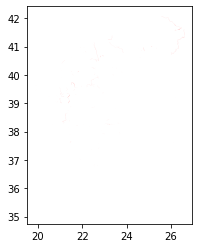

In [45]:
geo_lake = geo_water_gr[geo_water_gr['water'].str.contains('lake', na=False)]
geo_river = geo_water_gr[geo_water_gr['water'].str.contains('river', na=False)]
geo_river['geometry'].plot(linewidth=10, color = 'red')

C:\Users\owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\owner\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


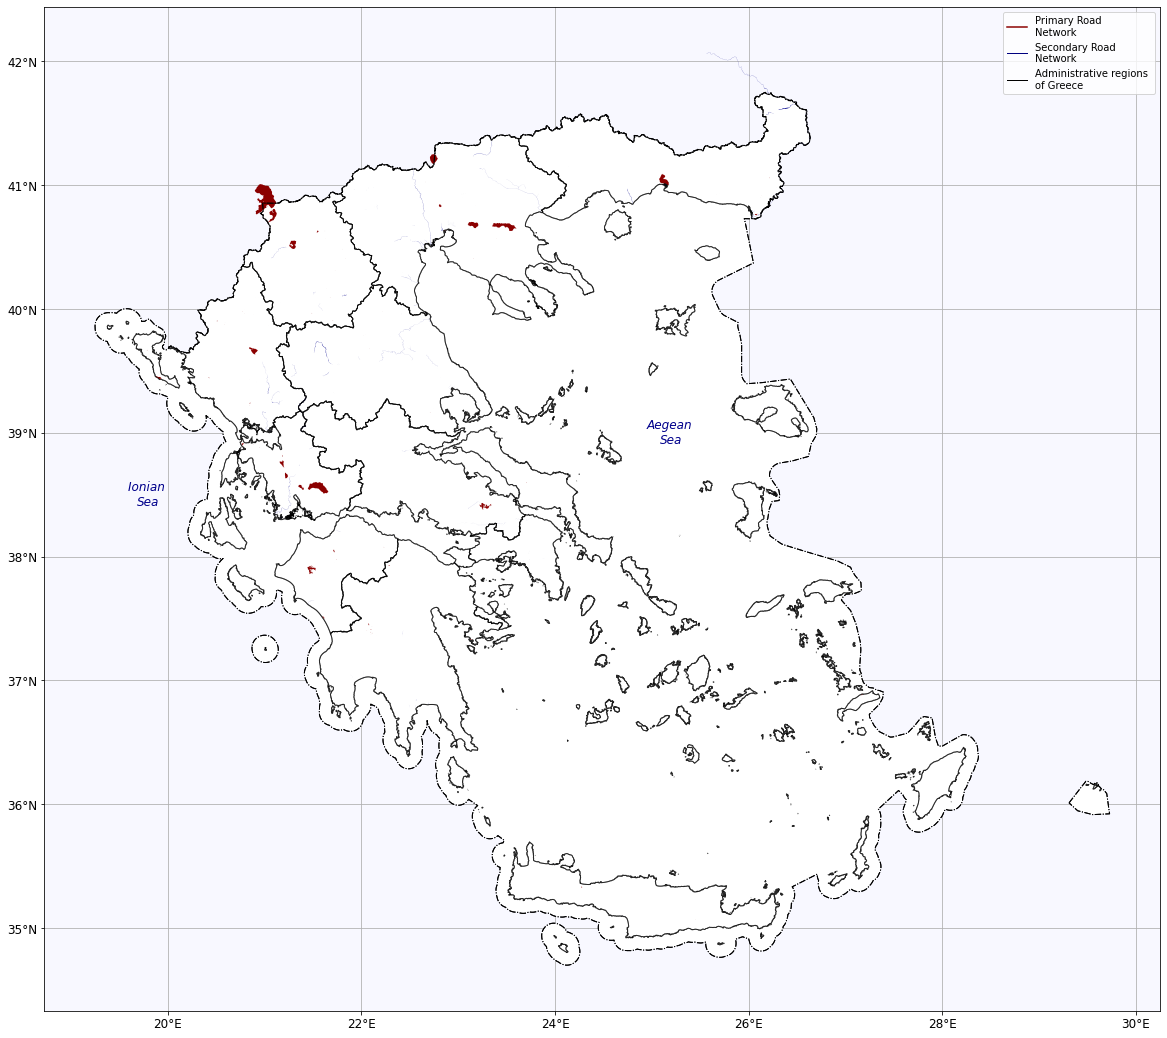

In [41]:
crs = fiona.crs.from_epsg(2100)
gr = gpd.read_file('greece.json')
gr = gpd.GeoDataFrame(gr, geometry = 'geometry', crs=crs)
greece = gpd.read_file("periphereies.shp")
greece = greece.to_crs(epsg=4326)
greece = greece.geometry

geo_water_gr = gpd.GeoDataFrame(water_gr, geometry = 'geometry', crs=crs)

hfont = {'fontname':'Helvetica'}

formatterY = FuncFormatter(lambda y, pos: u'{0:2g}\N{DEGREE SIGN}N'.format(y))
formatterX = FuncFormatter(lambda x, pos: u'{0:2g}\N{DEGREE SIGN}E'.format(x))

fig, ax = plt.subplots(figsize = (20, 20))
ax.plot([22.9,22.91], [40.65, 40.66], color = 'darkred', linewidth=1.5, label = 'Primary Road \nNetwork')
ax.plot([22.9,22.91], [40.65, 40.66], color = 'navy', linewidth=1, label = 'Secondary Road \nNetwork')
ax.plot([22.9,22.91], [40.65, 40.66], color = 'black', linewidth=1, label = 'Administrative regions \nof Greece')
plt.legend()

gr.plot(ax=ax, color = "white", edgecolor = 'black', ls = '-.', zorder = 8)
gr.plot(ax=ax, color = "none", edgecolor = 'black', ls = '-.', zorder = 12)
greece.plot(ax=ax, color = "white", edgecolor = 'black', linewidth=1, alpha = 0.6, zorder = 8)
greece.plot(ax=ax, color = "none", edgecolor = 'black', linewidth=1, alpha = 0.6, zorder = 12)
geo_lake.plot(ax=ax, color = 'darkred', zorder = 10)
geo_river.plot(ax=ax, color = 'darkblue', zorder = 10)

ax.text(25.2, 39, 'Aegean \nSea', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center', zorder = 12)
ax.text(19.8, 38.5, 'Ionian \nSea', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center', zorder = 12)

ax.grid()
ax.yaxis.set_major_formatter(formatterY)
ax.xaxis.set_major_formatter(formatterX)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_facecolor("ghostwhite")

In [3]:
place_name = "Greece"
print('got the place')
road_gr = ox.geometries.geometries_from_place(place_name,  tags = {"highway":["primary", "secondary"]})
print('got the primaries....')
road_gr2 = ox.geometries.geometries_from_place(place_name,  tags = {"highway":["residential", "pedestrian", "service"]})
print('got the secondaries....')

prim = np.sum(road_gr.geometry.to_crs(epsg=2100).length)/1000
sec = np.sum(road_gr2.geometry.to_crs(epsg=2100).length)/1000
df1 = road_gr.to_crs(epsg=2100)
df2 = road_gr2.to_crs(epsg=2100)
df1 = df1[['geometry', 'highway']]
df2 = df2[['geometry', 'highway']]
df1['lenght [km]'] = df1.geometry.length
df2['lenght [km]'] = df2.geometry.length
df1 = df1[df1['geometry'].type != 'Point']
df2 = df2[df2['geometry'].type != 'Point']
dff1 = df1.groupby('highway').sum()/1000
dff2 = df2.groupby('highway').sum()/1000

roads = dff1.append(dff2)
roads.index = ['Primary', 'Secondary', 'Pedestrian', 'Residential', 'Service']

labels = round(roads['lenght [km]'], 2)

got the place
got the primaries....


C:\Users\DTouloumidis\Anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\DTouloumidis\Anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\DTouloumidis\Anaconda3\lib\site-packages\osmnx\geometries.py:872: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  outer_polygons_wit

got the secondaries....


In [8]:
road_gr_f = road_gr.append(road_gr2)
road_gr_f

geometry  \
element_type osmid                                                           
way          5738798     LINESTRING (24.02504 35.50652, 24.02504 35.506...   
             5738803     LINESTRING (24.01978 35.51381, 24.01977 35.513...   
             22824634    LINESTRING (24.06184 35.48776, 24.06206 35.487...   
             22824693    LINESTRING (24.12511 35.51832, 24.12496 35.518...   
             22826411    LINESTRING (24.01474 35.48744, 24.01468 35.48737)   
...                                                                    ...   
             1039998768  LINESTRING (19.67570 39.75580, 19.67577 39.755...   
             1039998769  LINESTRING (19.67813 39.75702, 19.67817 39.757...   
             1039998771  LINESTRING (19.67710 39.75690, 19.67719 39.75695)   
             1039998772  LINESTRING (19.68475 39.74516, 19.68483 39.745...   
             1039998774  LINESTRING (19.68536 39.74535, 19.68542 39.745...   

                                                     name  \
element_type osmid                                          
way          5738798                              Νεάρχου   
             5738803                           Αποκορώνου   
             22824634                   Χανίων - Ρεθύμνου   
             22824693    Εθνική Οδός Χανίων - Αεροδρομίου   
             22826411                                 NaN   
...                                                   ...   
             1039998768                               NaN   
             1039998769                               NaN   
             1039998771                               NaN   
             1039998772                               NaN   
             1039998774                               NaN   

                                       name:en      highway source  \
element_type osmid                                                   
way          5738798                  Nearchou    secondary    NaN   
             5738803                       NaN    secondary    NaN   
             22824634                      NaN      primary    NaN   
             22824693    Chania - Airport Road    secondary    NaN   
             22826411                      NaN    secondary    NaN   
...                                        ...          ...    ...   
             1039998768                    NaN  residential    NaN   
             1039998769                    NaN  residential    NaN   
             1039998771                    NaN  residential    NaN   
             1039998772                    NaN  residential    NaN   
             1039998774                    NaN  residential    NaN   

                        traffic_signals:direction  \
element_type osmid                                  
way          5738798                          NaN   
             5738803                          NaN   
             22824634                         NaN   
             22824693                         NaN   
             22826411                         NaN   
...                                           ...   
             1039998768                       NaN   
             1039998769                       NaN   
             1039998771                       NaN   
             1039998772                       NaN   
             1039998774                       NaN   

                                                  name:el traffic_sign  \
element_type osmid                                                       
way          5738798                              Νεάρχου          NaN   
             5738803                                  NaN          NaN   
             22824634                                 NaN          NaN   
             22824693    Εθνική Οδός Χανίων - Αεροδρομίου          NaN   
             22826411                                 NaN          NaN   
...                                                   ...          ...   
             1039998768                               NaN       

C:\Users\DTouloumidis\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\DTouloumidis\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\DTouloumidis\Anaconda3\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (m

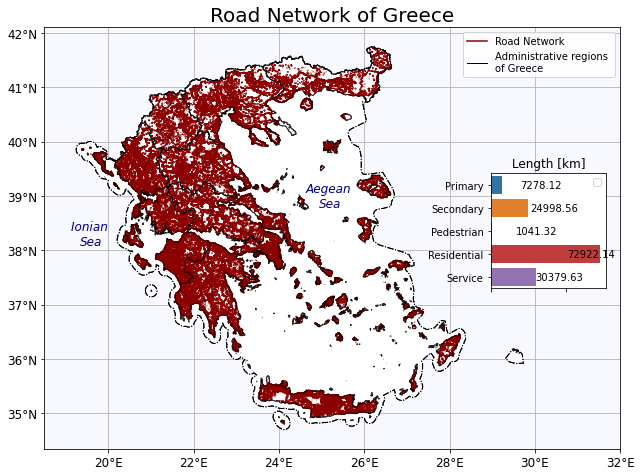

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
crs = fiona.crs.from_epsg(2100)
gr = gpd.read_file('greece.json')
gr = gpd.GeoDataFrame(gr, geometry = 'geometry', crs=crs)
greece = gpd.read_file("periphereies.shp")
greece = greece.to_crs(epsg=4326)
greece = greece.geometry

geo_road_gr = gpd.GeoDataFrame(road_gr_f, geometry = 'geometry', crs=crs)

formatterY = FuncFormatter(lambda y, pos: u'{0:2g}\N{DEGREE SIGN}N'.format(y))
formatterX = FuncFormatter(lambda x, pos: u'{0:2g}\N{DEGREE SIGN}E'.format(x))
hfont = {'fontname':'Helvetica'}

C:\Users\DTouloumidis\Anaconda3\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\DTouloumidis\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\DTouloumidis\Anaconda3\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\DTouloumidis\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\DTouloumidis\Anaconda3\lib\site-packages\geopandas\plotting.py:74: De

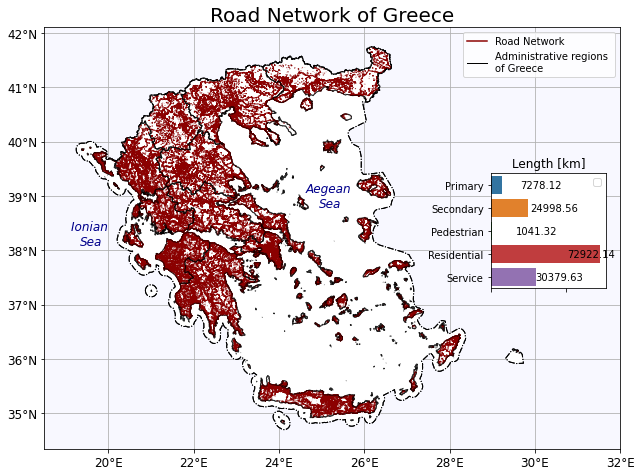

In [17]:
fig=plt.figure(figsize = (10, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.72, 0.43, 0.16, 0.16]) # inset axes

ax.plot([22.9,22.91], [40.65, 40.66], color = 'darkred', linewidth=1.5, label = 'Road Network')
# ax.plot([22.9,22.91], [40.65, 40.66], color = 'navy', linewidth=1, label = 'Secondary Road \nNetwork')
ax.plot([22.9,22.91], [40.65, 40.66], color = 'black', linewidth=1, label = 'Administrative regions \nof Greece')
ax.legend()

gr.plot(ax=ax, color = "white", edgecolor = 'black', ls = '-.', zorder = 8)
gr.plot(ax=ax, color = "none", edgecolor = 'black', ls = '-.', zorder = 12)
greece.plot(ax=ax, color = "white", edgecolor = 'black', linewidth=1, alpha = 0.6, zorder = 8)
greece.plot(ax=ax, color = "none", edgecolor = 'black', linewidth=1, alpha = 0.6, zorder = 12)
geo_road_gr.plot(ax=ax, color = 'darkred', linewidth=1.0, zorder = 10)
# georoad_gr_sc.plot(ax=ax, color = 'navy', linewidth=1, zorder = 9)
ax.text(25.2, 39, 'Aegean \nSea', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center', zorder = 12)
ax.text(19.6, 38.3, 'Ionian \nSea', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center', zorder = 12)

ax.yaxis.set_major_formatter(formatterY)
ax.xaxis.set_major_formatter(formatterX)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_facecolor("ghostwhite")
ax.set_xlim(18.5, 32)
ax.grid()
ax.set_title('Road Network of Greece', fontsize = 20, **hfont)

# roads.plot(ax = axes2, kind="barh", zorder = 2)
sns.barplot(y=roads.index,x=roads['lenght [km]'], data=roads,ci=95,ax=axes2)
# plt.grid(zorder = 1)
axes2.set_xlabel('')
axes2.set_ylabel('')
# axes2.set_xticks([])
axes2.set_title('Length [km]')
axes2.set_xticklabels([])
axes2.legend([])

patches = axes2.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        axes2.text(x + width/2. + 30000, y + height/2., label, ha='center', va='center')

plt.savefig('link6.jpg', format='jpg', dpi=1200)

In [ ]:
crs = fiona.crs.from_epsg(2100)
gr = gpd.read_file('greece.json')
gr = gpd.GeoDataFrame(gr, geometry = 'geometry', crs=crs)
greece = gpd.read_file("periphereies.shp")
greece = greece.to_crs(epsg=4326)
greece = greece.geometry


geo_road_gr = gpd.GeoDataFrame(road_gr, geometry = 'geometry', crs=crs)
georoad_gr_pr = geo_road_gr[geo_road_gr['highway'].str.contains('primary', na=False)]
georoad_gr_sc = geo_road_gr[geo_road_gr['highway'].str.contains('secondary', na=False)]

hfont = {'fontname':'Helvetica'}

formatterY = FuncFormatter(lambda y, pos: u'{0:2g}\N{DEGREE SIGN}N'.format(y))
formatterX = FuncFormatter(lambda x, pos: u'{0:2g}\N{DEGREE SIGN}E'.format(x))

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot([22.9,22.91], [40.65, 40.66], color = 'darkred', linewidth=1.5, label = 'Primary Road \nNetwork')
ax.plot([22.9,22.91], [40.65, 40.66], color = 'navy', linewidth=1, label = 'Secondary Road \nNetwork')
ax.plot([22.9,22.91], [40.65, 40.66], color = 'black', linewidth=1, label = 'Administrative regions \nof Greece')
plt.legend()

gr.plot(ax=ax, color = "white", edgecolor = 'black', ls = '-.', zorder = 8)
gr.plot(ax=ax, color = "none", edgecolor = 'black', ls = '-.', zorder = 12)
greece.plot(ax=ax, color = "white", edgecolor = 'black', linewidth=1, alpha = 0.6, zorder = 8)
greece.plot(ax=ax, color = "none", edgecolor = 'black', linewidth=1, alpha = 0.6, zorder = 12)
georoad_gr_pr.plot(ax=ax, color = 'darkred', linewidth=1.5, zorder = 10)
georoad_gr_sc.plot(ax=ax, color = 'navy', linewidth=1, zorder = 9)
ax.text(25.2, 39, 'Aegean \nSea', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center', zorder = 12)
ax.text(19.8, 38.5, 'Ionian \nSea', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center', zorder = 12)

ax.grid()
ax.yaxis.set_major_formatter(formatterY)
ax.xaxis.set_major_formatter(formatterX)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_facecolor("ghostwhite")
plt.title('Road Network of Greece', fontsize = 20, **hfont)
plt.savefig('link3.jpg', format='jpg', dpi=1200)

C:\Users\owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


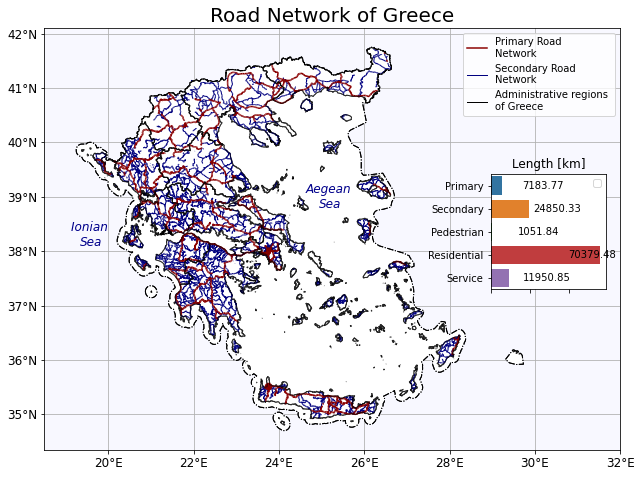

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

fig=plt.figure(figsize = (10, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.72, 0.43, 0.16, 0.16]) # inset axes

ax.plot([22.9,22.91], [40.65, 40.66], color = 'darkred', linewidth=1.5, label = 'Primary Road \nNetwork')
ax.plot([22.9,22.91], [40.65, 40.66], color = 'navy', linewidth=1, label = 'Secondary Road \nNetwork')
ax.plot([22.9,22.91], [40.65, 40.66], color = 'black', linewidth=1, label = 'Administrative regions \nof Greece')
ax.legend()

gr.plot(ax=ax, color = "white", edgecolor = 'black', ls = '-.', zorder = 8)
gr.plot(ax=ax, color = "none", edgecolor = 'black', ls = '-.', zorder = 12)
greece.plot(ax=ax, color = "white", edgecolor = 'black', linewidth=1, alpha = 0.6, zorder = 8)
greece.plot(ax=ax, color = "none", edgecolor = 'black', linewidth=1, alpha = 0.6, zorder = 12)
georoad_gr_pr.plot(ax=ax, color = 'darkred', linewidth=1.5, zorder = 10)
georoad_gr_sc.plot(ax=ax, color = 'navy', linewidth=1, zorder = 9)
ax.text(25.2, 39, 'Aegean \nSea', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center', zorder = 12)
ax.text(19.6, 38.3, 'Ionian \nSea', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center', zorder = 12)

ax.yaxis.set_major_formatter(formatterY)
ax.xaxis.set_major_formatter(formatterX)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_facecolor("ghostwhite")
ax.set_xlim(18.5, 32)
ax.grid()
ax.set_title('Road Network of Greece', fontsize = 20, **hfont)

# roads.plot(ax = axes2, kind="barh", zorder = 2)
sns.barplot(y=roads.index,x=roads['lenght [km]'], data=roads,ci=95,ax=axes2)
# plt.grid(zorder = 1)
axes2.set_xlabel('')
axes2.set_ylabel('')
# axes2.set_xticks([])
axes2.set_title('Length [km]')
axes2.set_xticklabels([])
axes2.legend([])

patches = axes2.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        axes2.text(x + width/2. + 30000, y + height/2., label, ha='center', va='center')

plt.savefig('greek_roads0.jpg', format='jpg', dpi=1200)

C:\Users\owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\owner\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


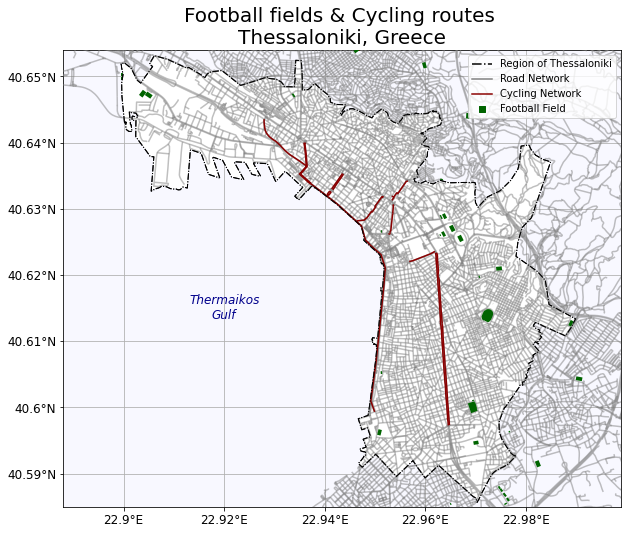

In [6]:
place_name = "Περιφερειακή Ενότητα Θεσσαλονίκης"
crs = fiona.crs.from_epsg(2100)
hiking = ox.geometries.geometries_from_place(place_name,  tags = {"highway":True})
football = ox.geometries.geometries_from_place(place_name,  tags = {"leisure":True})
# building = ox.geometries.geometries_from_place(place_name,  tags = {"building":True})
thess = gpd.read_file('thess.json')
thess2 = gpd.GeoDataFrame(thess, geometry = 'geometry', crs=crs)
# geo_build = gpd.GeoDataFrame(building, geometry = 'geometry', crs=crs)
# geo_build = geo_build[geo_build['geometry'].type != 'Point']

geo_road = gpd.GeoDataFrame(hiking, geometry = 'geometry', crs=crs)
geo_road2 = geo_road[geo_road['geometry'].type != 'Point']
# geo_road = geo_road[geo_road['highway'].str.contains('primary|secondary|residential|pedestrian|service', na=False)]
geo_cycl = geo_road[geo_road['highway'].str.contains('cycleway', na=False)]


# geo_hiking = gpd.GeoDataFrame(hiking, geometry = 'geometry', crs=crs)
# geo_hiking = geo_hiking[['highway', 'geometry']]
# geo_hiking2 = geo_hiking[geo_hiking['highway'].str.contains('footway|path', na=False)]

football2 = gpd.GeoDataFrame(football, geometry = 'geometry', crs=crs)
football2 = football2[['leisure','name', 'sport', 'geometry']]
football2 = football2[football2['geometry'].type == 'Polygon']
football2 = football2[football2['sport'].str.contains('soccer|stadium|pitch|stadium', na=False)]

hfont = {'fontname':'Helvetica'}

formatterY = FuncFormatter(lambda y, pos: u'{0:2g}\N{DEGREE SIGN}N'.format(y))
formatterX = FuncFormatter(lambda x, pos: u'{0:2g}\N{DEGREE SIGN}E'.format(x))

fig, ax = plt.subplots(figsize = (10, 10))
ax.grid()
ax.scatter(22.9, 40.65, color = 'darkgreen', marker = 's', label = 'Football Field')
ax.plot(22.9, 40.65, color = 'black', ls = '-.', label = 'Region of Thessaloniki')
ax.plot(22.9, 40.65, color = 'gray', label = 'Road Network')
ax.plot(22.9, 40.65, color = 'darkred', label = 'Cycling Network')
ax.text(22.92, 40.615, 'Thermaikos\nGulf', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center')
plt.legend().set_zorder(99)

thess2.plot(ax=ax, color = "white", edgecolor = 'black', ls = '-.', zorder = 8)
thess2.plot(ax=ax, color = "none", edgecolor = 'black', ls = '-.', zorder = 12)
football2.plot(ax=ax, facecolor='darkgreen', zorder = 11)
geo_road2.plot(ax=ax, color = "grey", edgecolor='grey', alpha = 0.5, zorder = 9)
geo_cycl.plot(ax=ax, color = 'darkred', zorder = 9)
# geo_build.plot(ax=ax, facecolor='#b8baba', zorder = 10)

ax.yaxis.set_major_formatter(formatterY)
ax.xaxis.set_major_formatter(formatterX)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_facecolor("ghostwhite")

# ax.set_xlim(22.88, 23)
# ax.set_ylim(40.57, 40.69)
ax.set_xlim(22.888, 22.999)
ax.set_ylim(40.585, 40.654)
plt.title('Football fields & Cycling routes \nThessaloniki, Greece', fontsize = 20, **hfont)
plt.savefig('link2.jpg', format='jpg', dpi=600)

In [93]:
crs = fiona.crs.from_epsg(2100)

leisure = ox.geometries.geometries_from_place(place_name,  tags = {"amenity":True})
thess = gpd.read_file('thess.json')
thess2 = gpd.GeoDataFrame(thess, geometry = 'geometry', crs=crs)

b = leisure[leisure['amenity'].str.contains('bar|cafe|nightclub|pub|restaurant', na=False)]
geo_bars = gpd.GeoDataFrame(b, geometry = 'geometry', crs=crs)
geo_bars = geo_bars[geo_bars['geometry'].type == 'Point']
bars = geo_bars[['geometry']]
colormap = cm.LinearColormap(colors=['blue', 'lightgreen', 'red'], index=[1, 3, 5], vmin=0, vmax=5)

stations = pd.DataFrame()
stations['latitude'] = bars.geometry.y
stations['longitude'] = bars.geometry.x

style2 = {'fillColor': '#00000000', 'color': '#000000', 'weight': '1',  'dashArray': ''}

for_map = folium.Map(location=[stations.latitude.values.mean(), stations.longitude.values.mean()], zoom_start=12)
hm_wide = HeatMap(
    list(zip(stations.latitude.values, stations.longitude.values)),
    min_opacity=0.30,
    radius=15, 
    blur=8)
folium.GeoJson(thess2['geometry'], style_function=lambda x:style2).add_to(for_map)
for_map.add_child(hm_wide)

for_map.add_child(colormap)

for_map

C:\Users\owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\owner\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


C:\Users\owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\owner\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


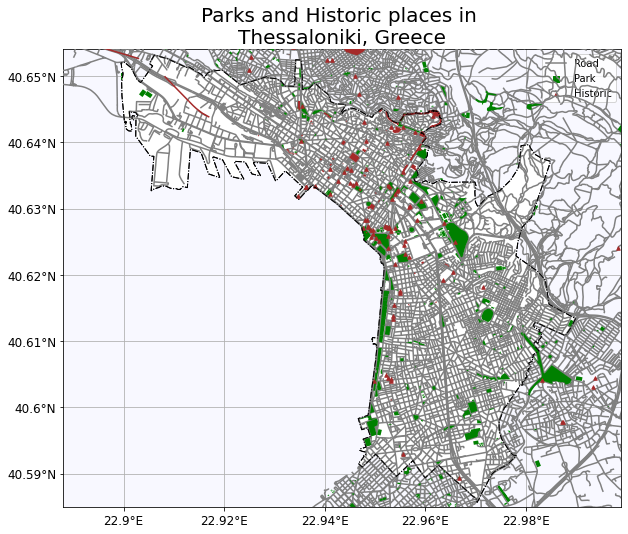

In [92]:
leisure = ox.geometries.geometries_from_place(place_name,  tags = {"leisure":True})
leisure = leisure[['leisure','name', 'geometry']]
leisure = leisure[leisure['geometry'].type == 'Polygon']
historic = ox.geometries.geometries_from_place(place_name,  tags = {"historic":True})
historic = historic[['historic','name', 'geometry']]
roads = ox.geometries.geometries_from_place(place_name,  tags = {"highway":True})

crs = fiona.crs.from_epsg(2100)
geo_parks = gpd.GeoDataFrame(leisure, geometry = 'geometry', crs=crs)
geo_hist = gpd.GeoDataFrame(historic, geometry = 'geometry', crs=crs)
geo_road = gpd.GeoDataFrame(roads, geometry = 'geometry', crs=crs)
# geo_sea = gpd.GeoDataFrame(sea, geometry = 'geometry', crs=crs)

geo_parks2 = geo_parks[geo_parks['leisure'].str.contains('park|garden|playground|dog_park|recreation_ground', na=False)]
geo_hist2 = geo_hist[geo_hist['geometry'].type == 'Polygon']
geo_road2 = geo_road[geo_road['geometry'].type != 'Point']

thess = gpd.read_file('thess.json')
thess2 = gpd.GeoDataFrame(thess, geometry = 'geometry', crs=crs)

grc = gpd.read_file('greece_coast.json')
grc2 = gpd.GeoDataFrame(grc, geometry = 'geometry', crs=crs)

hfont = {'fontname':'Helvetica'}

formatterY = FuncFormatter(lambda y, pos: u'{0:2g}\N{DEGREE SIGN}N'.format(y))
formatterX = FuncFormatter(lambda x, pos: u'{0:2g}\N{DEGREE SIGN}E'.format(x))

fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(22.9, 40.65, color = 'green', marker = 's',label = 'Park')
ax.scatter(22.9, 40.65, color = 'brown', marker = '^', s = 12, label = 'Historic', )
ax.plot([22.9,22.91], [40.65, 40.66], color = 'grey', label = 'Road')
plt.legend()

thess2.plot(ax=ax, color = "white", edgecolor = 'black', ls = '-.', zorder = 8)
thess2.plot(ax=ax, color = "none", edgecolor = 'black', ls = '-.', zorder = 12)
geo_parks.plot(ax=ax, facecolor='green', zorder = 10)
geo_hist.plot(ax=ax, facecolor='brown', marker = '^', markersize = 12, color = 'brown', zorder = 10)
geo_road2.plot(ax=ax, facecolor='grey', color = 'grey', zorder = 9)
# water.plot(ax=ax, facecolor='blue', color = 'blue', zorder = 9)
ax.grid()
ax.yaxis.set_major_formatter(formatterY)
ax.xaxis.set_major_formatter(formatterX)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_facecolor("ghostwhite")
ax.set_xlim(22.888, 22.999)
ax.set_ylim(40.585, 40.654)
plt.title('Parks and Historic places in \nThessaloniki, Greece', fontsize = 20, **hfont)
plt.savefig('link.jpg')

C:\Users\owner\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


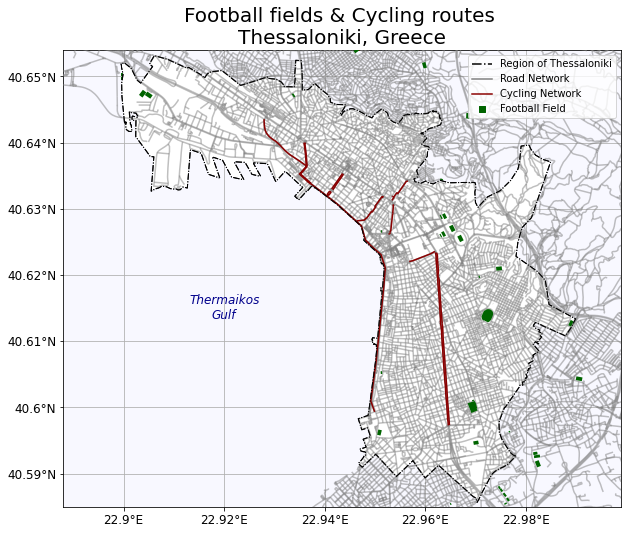

In [2]:
place_name = "Περιφερειακή Ενότητα Θεσσαλονίκης"
crs = fiona.crs.from_epsg(2100)
hiking = ox.geometries.geometries_from_place(place_name,  tags = {"highway":True})
football = ox.geometries.geometries_from_place(place_name,  tags = {"leisure":True})
# building = ox.geometries.geometries_from_place(place_name,  tags = {"building":True})
thess = gpd.read_file('thess.json')
thess2 = gpd.GeoDataFrame(thess, geometry = 'geometry', crs=crs)
# geo_build = gpd.GeoDataFrame(building, geometry = 'geometry', crs=crs)
# geo_build = geo_build[geo_build['geometry'].type != 'Point']

geo_road = gpd.GeoDataFrame(hiking, geometry = 'geometry', crs=crs)
geo_road2 = geo_road[geo_road['geometry'].type != 'Point']
# geo_road = geo_road[geo_road['highway'].str.contains('primary|secondary|residential|pedestrian|service', na=False)]
geo_cycl = geo_road[geo_road['highway'].str.contains('cycleway', na=False)]


# geo_hiking = gpd.GeoDataFrame(hiking, geometry = 'geometry', crs=crs)
# geo_hiking = geo_hiking[['highway', 'geometry']]
# geo_hiking2 = geo_hiking[geo_hiking['highway'].str.contains('footway|path', na=False)]

football2 = gpd.GeoDataFrame(football, geometry = 'geometry', crs=crs)
football2 = football2[['leisure','name', 'sport', 'geometry']]
football2 = football2[football2['geometry'].type == 'Polygon']
football2 = football2[football2['sport'].str.contains('soccer|stadium|pitch|stadium', na=False)]

hfont = {'fontname':'Helvetica'}

formatterY = FuncFormatter(lambda y, pos: u'{0:2g}\N{DEGREE SIGN}N'.format(y))
formatterX = FuncFormatter(lambda x, pos: u'{0:2g}\N{DEGREE SIGN}E'.format(x))

fig, ax = plt.subplots(figsize = (10, 10))
ax.grid()
ax.scatter(22.9, 40.65, color = 'darkgreen', marker = 's', label = 'Football Field')
ax.plot(22.9, 40.65, color = 'black', ls = '-.', label = 'Region of Thessaloniki')
ax.plot(22.9, 40.65, color = 'gray', label = 'Road Network')
ax.plot(22.9, 40.65, color = 'darkred', label = 'Cycling Network')
ax.text(22.92, 40.615, 'Thermaikos\nGulf', style='italic', fontsize = 12, color = 'darkblue', ha='center', va='center')
plt.legend().set_zorder(99)

thess2.plot(ax=ax, color = "white", edgecolor = 'black', ls = '-.', zorder = 8)
thess2.plot(ax=ax, color = "none", edgecolor = 'black', ls = '-.', zorder = 12)
football2.plot(ax=ax, facecolor='darkgreen', zorder = 11)
geo_road2.plot(ax=ax, color = "grey", edgecolor='grey', alpha = 0.5, zorder = 9)
geo_cycl.plot(ax=ax, color = 'darkred', zorder = 9)
# geo_build.plot(ax=ax, facecolor='#b8baba', zorder = 10)

ax.yaxis.set_major_formatter(formatterY)
ax.xaxis.set_major_formatter(formatterX)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_facecolor("ghostwhite")

# ax.set_xlim(22.88, 23)
# ax.set_ylim(40.57, 40.69)
ax.set_xlim(22.888, 22.999)
ax.set_ylim(40.585, 40.654)
plt.title('Football fields & Cycling routes \nThessaloniki, Greece', fontsize = 20, **hfont)
plt.savefig('link2.jpg', format='jpg', dpi=600)